In [57]:
import json
from os.path import expanduser
import networkx as nx
db = expanduser("~/Desktop/full_dblp.json")
database = json.loads(open(db, 'r').read())
G = nx.Graph()


In [120]:
# DAATABASE = List of PUBBLICATION
# PUBBLICATION -> 6 DICT= authors, id_conference, id_conference_int, id_publication, id_publication_int, title
# AUTHORS -> List of DICT (About 10500 in reduced json) -> {(author:Name , author_id:ID)}

In [58]:
import itertools
from collections import defaultdict

def pubblicationDictionary(json):
    pubb_dict = {}
    for pubblication in json:
        for author in pubblication["authors"]:
            if "&" in author["author"]:
                pass
            else:
                try:
                    pubb_dict[(author["author"],author["author_id"])] += [(pubblication["id_publication_int"],pubblication["id_publication"])]
                except:
                    pubb_dict[(author["author"],author["author_id"])] = [(pubblication["id_publication_int"],pubblication["id_publication"])]
    return(pubb_dict)


dictAutor = pubblicationDictionary(database)

for j in dictAutor.keys():
    G.add_node(j[1], id = j[1], author=j[0])

print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 851248
Number of edges: 0
Average degree:   0.0000


In [82]:
dict_publ = {}
for elem in range(len(database)):
    d = database[elem]['authors']
    for author in range(len(d)):
        if "&" in d[author]['author']:
            pass
        else:
            try:
                dict_publ[(database[elem]['id_publication'],database[elem]['id_publication_int'])].append((d[author]['author'], d[author]['author_id']))
            except:
                dict_publ[(database[elem]['id_publication'],database[elem]['id_publication_int'])] = [(d[author]['author'], d[author]['author_id'])]

dew = defaultdict(list)
for keys in dictAutor.keys():
    for i in range(len(dictAutor[keys])):
        try:
            dew[keys].append(dictAutor[keys][i][0])
        except:
            dew[keys]=dictAutor[keys][i][0]

def Jaccard(a,b):
    jaccard = (abs(len(list(set(a)|set(b))))-abs(len(list(set(a)&set(b)))))/abs(len(list(set(a)|set(b))))
    return jaccard

# ADD EDGE            
for k,v in dict_publ.items():
    for i in itertools.combinations(v,2):
        G.add_edge(i[0][1],i[1][1], pubblication=k[0], id = k[1], weight=Jaccard(dew[i[0]],dew[i[1]]))

print(nx.info(G))


Name: 
Type: Graph
Number of nodes: 851248
Number of edges: 3278453
Average degree:   7.7027


In [5]:
elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] == 0.5]
print(len(elarge))

202654


In [60]:
def graphConference(json, int_conference):
    conf_sublist = []
    for publ in json:
        if publ['id_conference_int'] == int_conference:
            for aut in publ['authors']:
                conf_sublist.append(aut['author_id'])
    set(conf_sublist)
    newG = G.subgraph(conf_sublist)
    return newG

h = graphConference(database, 3345)
betweness = nx.betweenness_centrality(h)
closeness = nx.closeness_centrality(h)
degree = nx.degree(h)


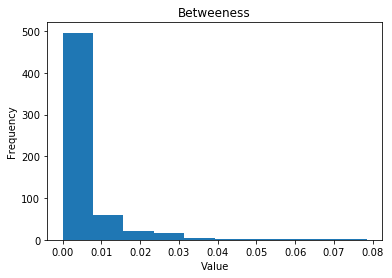

In [63]:
import matplotlib.pyplot as plt
betwn_val = []
for k in betweness.keys():
    betwn_val.append(betweness[k])
plt.hist(betwn_val)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Betweeness')
plt.show()

In [67]:
#return ID of the author
def get_id_author(authorName):
    autID = {}
    for pubblication in database:
        for author in pubblication["authors"]:
            try:
                autID[author["author"]].append(author["author_id"])
            except:
                autID[author["author"]] = author["author_id"]
    return autID[authorName]


In [68]:
# Return the subgraph of the author with max distance = d
def author_dist(author, d):
    a = get_id_author(author)
    nodelist = nx.single_source_shortest_path_length(G, source=a, cutoff=d)
    subg = G.subgraph([k for k,v in nodelist.items()])
    return subg



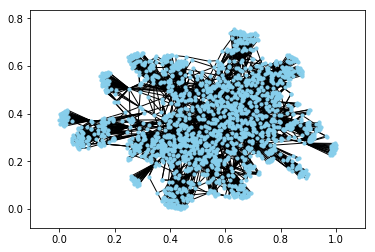

In [76]:
aut = author_dist('wagner meira jr.',2)

import matplotlib.pyplot as plt 
nx.draw_networkx(aut,with_labels=False, node_size=10, node_color="skyblue", pos=nx.spring_layout(aut))
plt.show()

In [97]:
G[1][2]['weight']

0.75